   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -114.3      34.2                15.0       5612.0          1283.0   
1     -114.5      34.4                19.0       7650.0          1901.0   
2     -114.6      33.7                17.0        720.0           174.0   
3     -114.6      33.6                14.0       1501.0           337.0   
4     -114.6      33.6                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0            1.5                66.9  
1      1129.0       463.0            1.8                80.1  
2       333.0       117.0            1.7                85.7  
3       515.0       226.0            3.2                73.4  
4       624.0       262.0            1.9                65.5  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count    17000.0   17000.0             17000.0      17000.0         17000.0   
mean      -11

d:\CADT University\CADT-Y3\CodeAllSub\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 39580.2852 - root_mean_squared_error: 197.9070
Epoch 2/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7876.6670 - root_mean_squared_error: 88.6860
Epoch 3/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7003.6851 - root_mean_squared_error: 83.6782
Epoch 4/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7027.1157 - root_mean_squared_error: 83.8066
Epoch 5/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6910.2144 - root_mean_squared_error: 83.1169
Epoch 6/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6983.4580 - root_mean_squared_error: 83.5615
Epoch 7/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7166.2627 - root_mean_squared_error: 84.6370
Epoch 8/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6948.9268 - root_mean_squared_error: 83.3541
Epoch 9/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7015.1631 - root_mean_squared_error: 83.7389
Epoch 10/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

C:\Users\leap0\AppData\Local\Temp\ipykernel_15800\2890985636.py:100: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\nThe learning rate for the model is %.4f" % weight)
C:\Users\leap0\AppData\Local\Temp\ipykernel_15800\2890985636.py:101: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The learned bias for the model is %.4f\n" % bias)


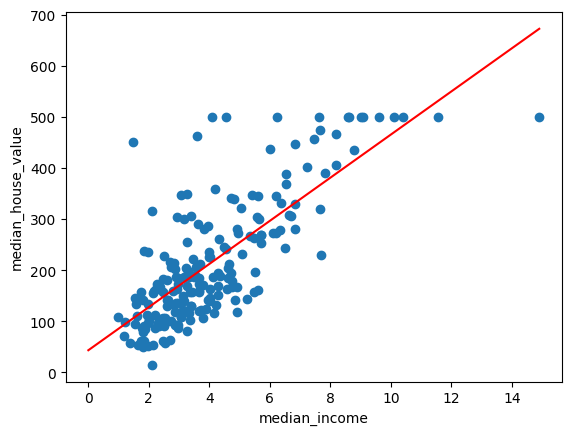

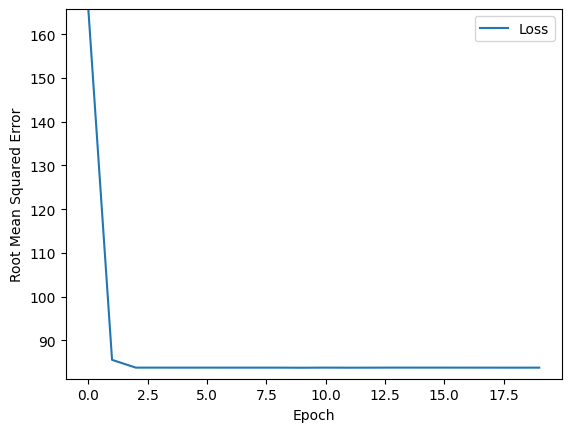

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             134
    4     92             212
    3     69             154
    2     62             132
    3     80             153
    2    295             148
   10    500             456
    5    342             260
    2    118             147
    4    128             221
                    longitude  latitude  housing_median_age  total_rooms  \
longitude                 1.0      -0.9                -0.1          0.0   
latitude                 -0.9       1.0                 0.0         -0.0   
housing_median_age       -0.1       0.0                 1.0         -0.4   
total_rooms               0.0      -0.0                -0.4          1.0   
total_bedrooms            0.1      -0.1                -0.3          0.9   
population                0.1      -0.1                -0.3          0.9   
households                0.1      

In [1]:
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

#Import dataset
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

#scale the value
training_df['median_house_value'] /= 1000.0

#Print the firt value of the dataset
print(training_df.head())
print(training_df.describe())


#implement model 

def build_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape = (1,)))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                  loss = "mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model
# code for train model
def train_model(model, df, feature, label, epochs, batch_size):
    #feed and train model by giving feature and label
    # the model will train for a specified number of epochs
    history = model.fit(x=df[feature],
                        y=df[label],
                        batch_size=batch_size,
                        epochs = epochs)
    #gather the train model's weight and bias
    trained_weight = model.get_weights()[0][0]
    trained_bias = model.get_weights()[1]

    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    #track progression of training: we take snapeshot of model's root mean squared error at each epochs
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight, trained_bias, epochs, rmse
print("Defined the build_model and train_model functions.")

#define the plotting function 
def plot_the_model(train_weight, trained_bias, feature, label):

    # Label the axes
    plt.xlabel(feature)
    plt.ylabel(label)

    #create a scatter plot 
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])

    # create red line for the prediction of model
    x0 = 0
    y0 = trained_bias
    x1 = random_examples[feature].max()
    y1 = trained_bias + (train_weight * x1)
    plt.plot([x0,x1], [y0, y1], c = 'r')

    plt.show()
    
# plot of the loss curve 
def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label = "Loss")
    plt.legend()
    plt.ylim([rmse.min()* 0.97, rmse.max()])
    plt.show()
print("Defined the plot_the_model and plot_the_loss_curve functions.")

# hyperparameters 
training_df["room_per_person"] = training_df["total_rooms"]/training_df["population"]

learning_rate = 0.07
epochs = 20
batch_size = 35

# specifying the feature and label
my_feature = "median_income"
my_label = "median_house_value"

#discard old model
my_model = None

# invoke new model
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
print("\nThe learning rate for the model is %.4f" % weight)
print("The learned bias for the model is %.4f\n" % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


# make a prediction for house
def predict_house_values(n, feature, label):
    """Predict house values based on feature."""
    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(n):
        print("%5.0f %6.0f %15.0f"% (training_df[feature][10000 + i],
                                     training_df[label][10000 + i],
                                     predicted_values[i][0]) )
predict_house_values(10, my_feature, my_label)
print(training_df.corr())

In [ ]:
# pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow
